# <u>ACCOUNT RECEIVABLES PROJECT<u>

# 1.Import Libraries

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from datetime import timedelta, date

import warnings
warnings.filterwarnings("ignore")

# 2.Load Data Set & Explore

In [4]:
import pandas as pd
df = pd.read_csv("C:\\Users\\KIIT\\HRC\\PRAC_DATASET\\1805096Prac.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH co,2019-08-30 00:00:00,2019.0,1.929748e+09,2019-08-18,20190815,20190818,20190902.0,USD,RV,1.0,NaN,19544.87,20190818.0,NAC6,1.929748e+09,0
1,U001,0200720238,WOODM trust,2019-12-20 00:00:00,2019.0,1.930256e+09,2019-12-10,20191210,20191210,20191225.0,USD,RV,1.0,NaN,86033.06,20191210.0,NAA8,1.930256e+09,0
2,U001,0200748108,KROGER us,2019-04-29 00:00:00,2019.0,1.929145e+09,2019-04-14,20190414,20190414,20190429.0,USD,RV,1.0,NaN,85836.29,20190414.0,NAA8,1.929145e+09,0
3,U001,0200705089,JETR co,2019-02-11 00:00:00,2019.0,1.928657e+09,2019-01-21,20190122,20190121,20190205.0,USD,RV,1.0,NaN,8686.76,20190121.0,NAA8,1.928657e+09,0
4,U001,0200772670,ASSOCIAT foundation,2019-02-15 00:00:00,2019.0,1.928711e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,1.0,NaN,34297.73,20190131.0,NAU5,1.928711e+09,0


In [5]:
#shape of our provided dataset.
df.shape

(50000, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45010 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [7]:
# to get the statistical report of our columns
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999600e+04,50000.000000
mean,2019.217620,2.012525e+09,2.019264e+07,2.019267e+07,2.019282e+07,1.0,NaN,3.248985e+04,2.019267e+07,2.011926e+09,0.099800
std,0.412632,2.856005e+08,4.015232e+03,3.994513e+03,4.006926e+03,0.0,NaN,4.085680e+04,3.995895e+03,2.776480e+08,0.299736
min,2019.000000,1.928502e+09,2.018123e+07,2.018111e+07,2.018112e+07,1.0,NaN,2.200000e-01,2.018111e+07,1.928502e+09,0.000000
25%,2019.000000,1.929236e+09,2.019042e+07,2.019042e+07,2.019051e+07,1.0,NaN,4.707710e+03,2.019042e+07,1.929236e+09,0.000000
50%,2019.000000,1.929820e+09,2.019081e+07,2.019081e+07,2.019083e+07,1.0,NaN,1.736659e+04,2.019081e+07,1.929820e+09,0.000000
75%,2019.000000,1.930431e+09,2.019120e+07,2.019120e+07,2.019122e+07,1.0,NaN,4.671563e+04,2.019120e+07,1.930431e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.673456e+06,2.020052e+07,2.960636e+09,1.000000


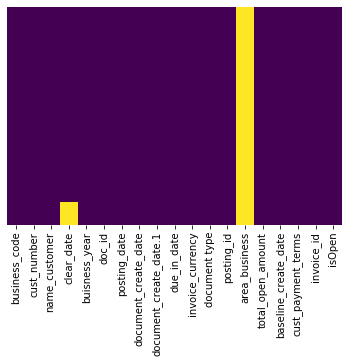

In [8]:
# show the null values of column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Slicing out the records with clearing date <u>NULL<u>

In [9]:
# we will keep all the rows having clear date equals NULL as a separate column for final prediction.

df_final_test = df.loc[df['clear_date'].isnull()].reset_index(drop=True)
df_final_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA us,NaN,2020.0,1.930804e+09,2020-04-21,20200421,20200421,20200509.0,USD,RV,1.0,NaN,3286.72,20200416.0,NAM4,1.930804e+09,1
1,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,4322.59,20200311.0,NAA8,1.930633e+09,1
2,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930846e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,50123.11,20200502.0,NAH4,1.930846e+09,1
3,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930684e+09,2020-03-22,20200321,20200322,20200406.0,USD,RV,1.0,NaN,356.39,20200322.0,NAH4,1.930684e+09,1
4,CA02,0140104429,COSTCO in,NaN,2020.0,2.960632e+09,2020-05-06,20200506,20200506,20200518.0,CAD,RV,1.0,NaN,2201.38,20200508.0,CA10,2.960632e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930585e+09,2020-03-01,20200301,20200301,20200316.0,USD,RV,1.0,NaN,20544.58,20200301.0,NAH4,1.930585e+09,1
4986,U001,0200418007,AM llc,NaN,2020.0,1.930607e+09,2020-03-06,20200305,20200306,20200321.0,USD,RV,1.0,NaN,36873.79,20200306.0,NAA8,1.930607e+09,1
4987,U001,0200761734,H E BUT co,NaN,2020.0,1.930606e+09,2020-03-05,20200305,20200305,20200320.0,USD,RV,1.0,NaN,73529.85,20200305.0,NAA8,1.930606e+09,1
4988,U001,0200747369,SCHNU co,NaN,2020.0,1.930593e+09,2020-03-02,20200303,20200302,20200317.0,USD,RV,1.0,NaN,5555.13,20200302.0,NAA8,1.930593e+09,1


### Remaining Data for Train, Val and Test.

In [10]:
# our big set for training, val and test.
df=df.loc[df['clear_date'].notna()].reset_index(drop=True) # keeping only rows which doesn't have clear date as NULL
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH co,2019-08-30 00:00:00,2019.0,1.929748e+09,2019-08-18,20190815,20190818,20190902.0,USD,RV,1.0,NaN,19544.87,20190818.0,NAC6,1.929748e+09,0
1,U001,0200720238,WOODM trust,2019-12-20 00:00:00,2019.0,1.930256e+09,2019-12-10,20191210,20191210,20191225.0,USD,RV,1.0,NaN,86033.06,20191210.0,NAA8,1.930256e+09,0
2,U001,0200748108,KROGER us,2019-04-29 00:00:00,2019.0,1.929145e+09,2019-04-14,20190414,20190414,20190429.0,USD,RV,1.0,NaN,85836.29,20190414.0,NAA8,1.929145e+09,0
3,U001,0200705089,JETR co,2019-02-11 00:00:00,2019.0,1.928657e+09,2019-01-21,20190122,20190121,20190205.0,USD,RV,1.0,NaN,8686.76,20190121.0,NAA8,1.928657e+09,0
4,U001,0200772670,ASSOCIAT foundation,2019-02-15 00:00:00,2019.0,1.928711e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,1.0,NaN,34297.73,20190131.0,NAU5,1.928711e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45005,U001,0200769623,WAL-MAR us,2019-08-27 00:00:00,2019.0,1.929753e+09,2019-08-17,20190816,20190817,20190901.0,USD,RV,1.0,NaN,51835.05,20190817.0,NAH4,1.929753e+09,0
45006,U001,0200353024,DECA,2019-03-04 00:00:00,2019.0,1.928858e+09,2019-02-26,20190226,20190226,20190311.0,USD,RV,1.0,NaN,933.64,20190216.0,NAM4,1.928858e+09,0
45007,U001,0100031704,DELHAIZE corp,2020-01-28 00:00:00,2020.0,1.930388e+09,2020-01-10,20200110,20200110,20200125.0,USD,RV,1.0,NaN,109608.70,20200110.0,NAA8,1.930388e+09,0
45008,U001,0200794332,COST associates,2020-02-25 00:00:00,2020.0,1.930512e+09,2020-02-12,20200211,20200212,20200227.0,USD,RV,1.0,NaN,36515.07,20200212.0,NAAX,1.930512e+09,0


# 3.Data Preprocessing

In [11]:
# Get the unique value of each columns and it's length
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
nu

,feature,nunique
0,business_code,6
1,cust_number,1381
2,name_customer,4151
3,clear_date,401
4,buisness_year,2
5,doc_id,45010
6,posting_date,422
7,document_create_date,427
8,document_create_date.1,423
9,due_in_date,495


In [12]:
# from the above table 
# we analyse doc_id has all unique values
# posting_id has all constant values.
# area business has all Null Values 
# invoice_id has almost all unique values

In [13]:
# # doc_id has all unique values
# so we are dropping it.
df.drop(columns=['doc_id'],inplace=True)

In [14]:
# posting_id has only 1 unique values 
# so we are dropping it.
df.drop(columns=['posting_id'],inplace=True)

In [15]:
print(df['area_business'].isna().sum()) # count of null values in area business column

# Area business has all null values therefore dropping it.
df.dropna(axis=1,how='all',inplace=True) # area_business column dropped.

45010


In [16]:
# now we will check for duplicate rows
df.duplicated().sum()

0

In [17]:
# invoice_id has almost all unique values.
print(df.invoice_id.isnull().sum())
# and has 4 null values 
# therefore better to drop this column as well
df.drop(columns=['invoice_id'],inplace=True)

4


In [18]:
# changing date columns type from Objects & floats to datetime 


#here we changed the documnet_create_date format.
df['clear_date']=pd.to_datetime(df['clear_date'], format='%Y-%m-%d %H:%M:%S',errors='coerce') 

# here we changed the documnet_create_date format.
df['document_create_date']=pd.to_datetime(df['document_create_date'], format='%Y%m%d',errors='coerce') 

# here we changed the documnet_create_date.1 format.
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d', errors='coerce') 

# changine due_in_date format from float to date
df['due_in_date']=pd.to_datetime(df['due_in_date'], format='%Y%m%d') 

# changing baseline_create_date format to date
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')

# changing posting_date format to date
df['posting_date']=pd.to_datetime(df['posting_date'], format='%Y-%m-%d') 

df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200762301,C&S WH co,2019-08-30,2019.0,2019-08-18,2019-08-15,2019-08-18,2019-09-02,USD,RV,19544.87,2019-08-18,NAC6,0
1,U001,0200720238,WOODM trust,2019-12-20,2019.0,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,RV,86033.06,2019-12-10,NAA8,0
2,U001,0200748108,KROGER us,2019-04-29,2019.0,2019-04-14,2019-04-14,2019-04-14,2019-04-29,USD,RV,85836.29,2019-04-14,NAA8,0
3,U001,0200705089,JETR co,2019-02-11,2019.0,2019-01-21,2019-01-22,2019-01-21,2019-02-05,USD,RV,8686.76,2019-01-21,NAA8,0
4,U001,0200772670,ASSOCIAT foundation,2019-02-15,2019.0,2019-01-31,2019-01-31,2019-01-31,2019-02-15,USD,RV,34297.73,2019-01-31,NAU5,0


In [19]:
# sorting final train data according to document_create_date.1 as well are delay with time related data
df.sort_values("document_create_date.1",inplace = True)
df.reset_index(drop=True,inplace=True)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140104409,LOB associates,2019-12-27,2019.0,2019-03-29,2019-03-29,2018-11-07,2018-11-17,CAD,X2,396.60,2018-11-07,CA10,0
1,U001,0200668077,IN-N- foundation,2019-01-17,2019.0,2018-12-30,2018-12-31,2018-12-30,2019-01-09,USD,RV,26582.40,2018-12-30,NA10,0
2,U001,0200744019,TARG co,2019-01-18,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,53110.54,2018-12-30,NAA8,0
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,16975.04,2018-12-30,NAH4,0
4,U001,0200706844,WINC systems,2019-01-15,2019.0,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,57640.90,2018-12-30,NAA8,0


In [20]:
# removing date anomalies.
# as creation date can't be greater than clear and due date.

df.drop(df[df['document_create_date.1'] > df['due_in_date']].index, inplace = True)
df.drop(df[df['document_create_date.1'] > df['clear_date']].index, inplace = True)
df.shape

(44877, 15)

In [21]:
# Creating Target column i.e., Delay

df['delay']=df['clear_date']-df['due_in_date']
df['delay']=df['delay'].dt.days.astype('int16')
df['delay']

0        405
1          8
2          4
3         -5
4          1
        ... 
45005      0
45006      9
45007     -1
45008      9
45009     19
Name: delay, Length: 44877, dtype: int16

In [22]:
df.shape

(44877, 16)

In [23]:
# posting_date , baseline_create_date and document_create_.1 infer somewhat same thing lets see
# how many of them are unique.

print(df[df['posting_date']==df['document_create_date.1']].shape)
print(df[df['baseline_create_date']==df['document_create_date.1']].shape)

(44873, 16)
(39983, 16)


In [24]:
# both the columns posting and document_create_date and posting date have same values
# also baseline date and document create date have almost same values
# and we document_create_date and document_create_date.1 have same values.

# so we will drop posting_date, document_create_date and baseline_create_date

df.drop(columns=['posting_date','baseline_create_date','document_create_date'],axis=1,inplace=True)

In [25]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,isOpen,delay
0,CA02,0140104409,LOB associates,2019-12-27,2019.0,2018-11-07,2018-11-17,CAD,X2,396.60,CA10,0,405
1,U001,0200668077,IN-N- foundation,2019-01-17,2019.0,2018-12-30,2019-01-09,USD,RV,26582.40,NA10,0,8
2,U001,0200744019,TARG co,2019-01-18,2019.0,2018-12-30,2019-01-14,USD,RV,53110.54,NAA8,0,4
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,16975.04,NAH4,0,-5
4,U001,0200706844,WINC systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,57640.90,NAA8,0,1


In [26]:
# Get the unique value of each columns and it's length
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
nu

,feature,nunique
0,business_code,6
1,cust_number,1381
2,name_customer,4149
3,clear_date,401
4,buisness_year,2
5,document_create_date.1,423
6,due_in_date,494
7,invoice_currency,2
8,document type,2
9,total_open_amount,40650


In [27]:
# we can see isOpen is has all constant values so drop it.

df.drop(columns=['isOpen'],axis=1,inplace=True)

In [28]:
# shape of dataframe after pre-processing
df.shape

(44877, 12)

### Spilitng the pre-processed dataset into <u>Train,Val and Test.<u>

In [29]:
X = df.drop(['delay'],axis=1)
y = df['delay']

# splitting dataFrame into train = 90% and test = 10% size.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.10, random_state=42,shuffle=False)
#further splitting train into train = 85% and val = 15% size. 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42,shuffle=False)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34330, 11)
(4488, 11)
(6059, 11)


# 4.Exploratory Data Analysis

In [31]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,CA02,0140104409,LOB associates,2019-12-27,2019.0,2018-11-07,2018-11-17,CAD,X2,396.60,CA10
1,U001,0200668077,IN-N- foundation,2019-01-17,2019.0,2018-12-30,2019-01-09,USD,RV,26582.40,NA10
2,U001,0200744019,TARG co,2019-01-18,2019.0,2018-12-30,2019-01-14,USD,RV,53110.54,NAA8
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,16975.04,NAH4
4,U001,0200706844,WINC systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,57640.90,NAA8


In [32]:
# to separate numerical and categorical column

num_col = X_train.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)


cat_col = X_train.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['buisness_year', 'total_open_amount'], dtype='object')
Categorical columns: 
 Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'cust_payment_terms'],
      dtype='object')


In [33]:
# now let's plot our categorical columns

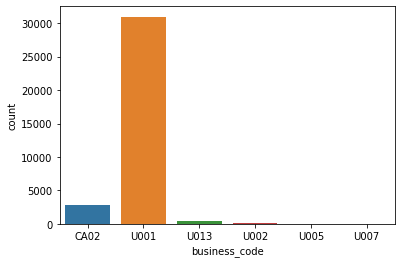

In [34]:
sns.countplot(data=X_train, x='business_code') # count of each business_Code

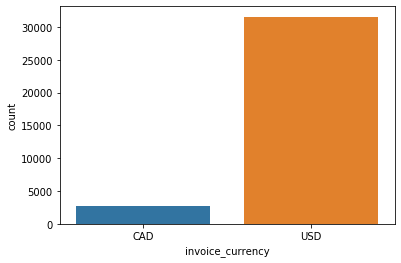

In [35]:
sns.countplot(data=X_train, x='invoice_currency')  #count of each invoice_currency

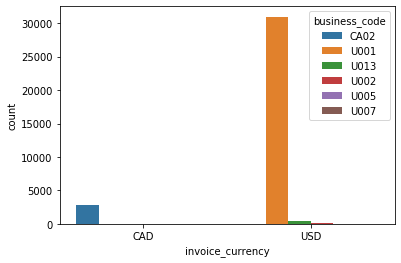

In [36]:
sns.countplot(data=X_train, x='invoice_currency',hue='business_code')

In [37]:
# from the above plot we can see that 
# only business_code : U001 & CA02 is contributing much
# also it can be seen business_code is a mixed variable where prefixes U and C denotes USD and CAD currency.

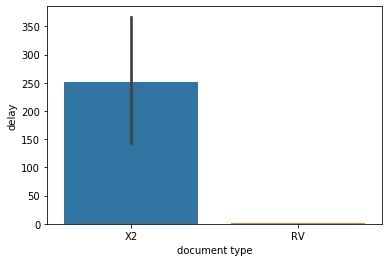

In [38]:
X_train['delay'] = y_train 
sns.barplot(X_train['document type'] , X_train['delay'])

In [39]:
# This shows that X2 is more prone to delay.

In [40]:
# print(X_train.cust_number.value_counts())
# mean_map = X_train.groupby('cust_number')['delay'].mean()
# mean_map.value_counts().count()

mean_delay_map = X_train.groupby('cust_number')['delay'].mean().to_dict()
X_train['mean_delay'] = X_train['cust_number'].map(mean_delay_map)

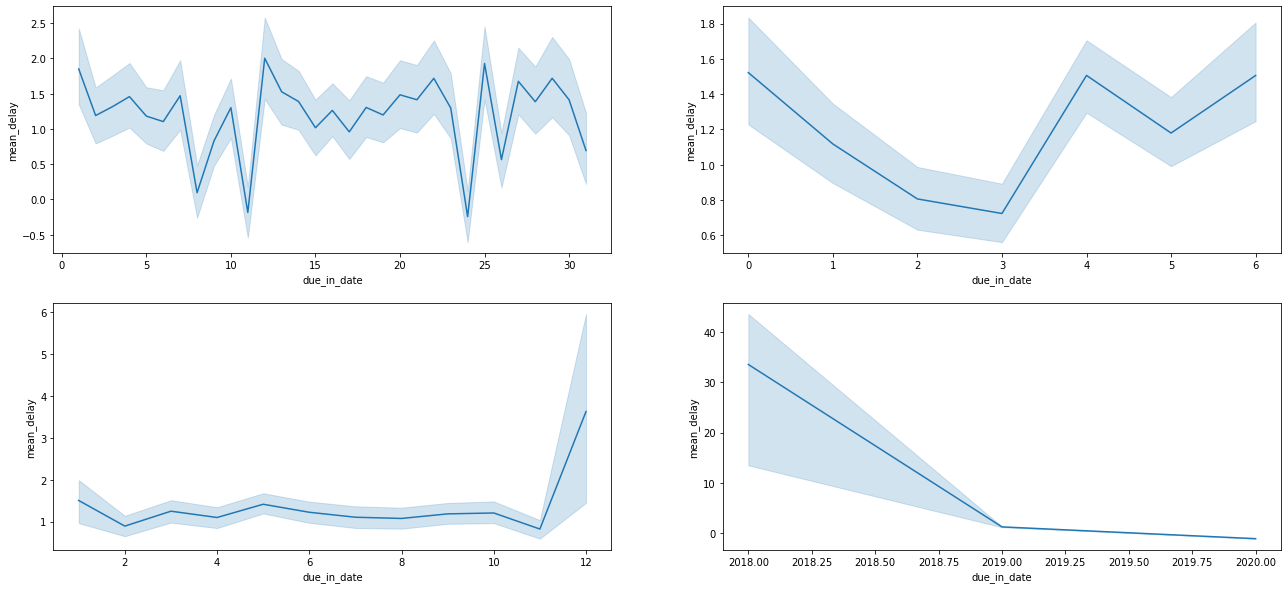

In [41]:
#seeing the relation between the day, dayofweek, month, year of due_in_date with mean_delay of customer.
fig,ax=plt.subplots(2,2,figsize=(22,10))
sns.lineplot(X_train['due_in_date'].dt.day, X_train['mean_delay'] , ax=ax[0][0])       #top-left
sns.lineplot(X_train['due_in_date'].dt.dayofweek, X_train['mean_delay'] , ax=ax[0][1]) #top-right
sns.lineplot(X_train['due_in_date'].dt.month, X_train['mean_delay'], ax=ax[1][0])      #bottom-left
sns.lineplot(X_train['due_in_date'].dt.year, X_train['mean_delay'], ax=ax[1][1])       #bottom-right
plt.show()


#now we can drop mean delay
X_train.drop('mean_delay',axis=1,inplace=True)

In [42]:
#The above plot shows us 
# 1. on dayofweek 4 & 6 delay is increasing
# 2. on last month delay is increasing
# 3. on year 2018 dealy was more 

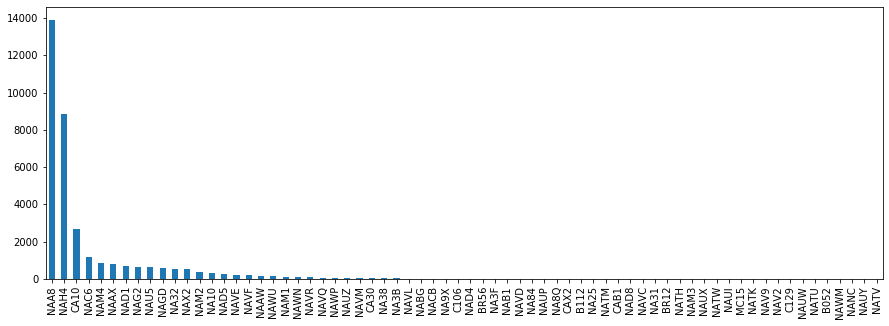

In [43]:
# shows the 
X_train['cust_payment_terms'].value_counts().plot(kind='bar',figsize=(15, 5));
plt.show()

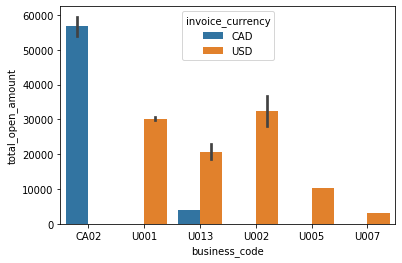

In [44]:
sns.barplot(data=X_train,x='business_code',y='total_open_amount',hue='invoice_currency')

                  total_open_amount     delay
invoice_currency                             
CAD                    56816.468387  6.253338
USD                    30142.505749  0.718907


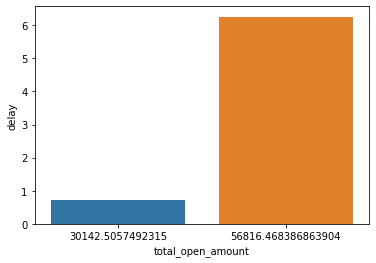

In [45]:
X_train['delay']=y_train # joining target variable to analyse delay with independent varibles.
df1=X_train.groupby('invoice_currency')[['total_open_amount','delay']].mean()
print(df1.head())
sns.barplot(x=df1['total_open_amount'],y=df1['delay'])

In [46]:
# Here we can observe most of the delay is for CAD currency and also total_open_amount of CAD is twice that of USD.

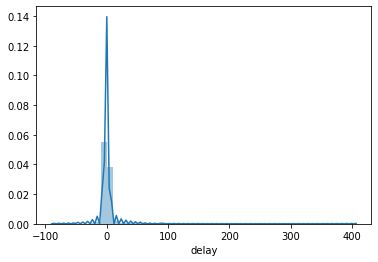

In [47]:
sns.distplot(X_train['delay']) # we can see a uniform delay graph

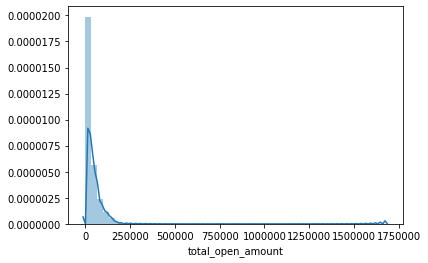

In [48]:
sns.distplot(X_train['total_open_amount'])

In [49]:
# total open amount is rightly skewed 
# in below we can apply log transformation.

     cust_number  name_customer
0     0100000048              3
1     0100000051              1
2     0100000158              4
3     0100000217              2
4     0100000222             38
...          ...            ...
1295      CC7470              1
1296      CCCA02            402
1297      CCU001             40
1298      CCU002            102
1299      CCU013            513

[1300 rows x 2 columns]


Text(0, 0.5, 'Frequency')

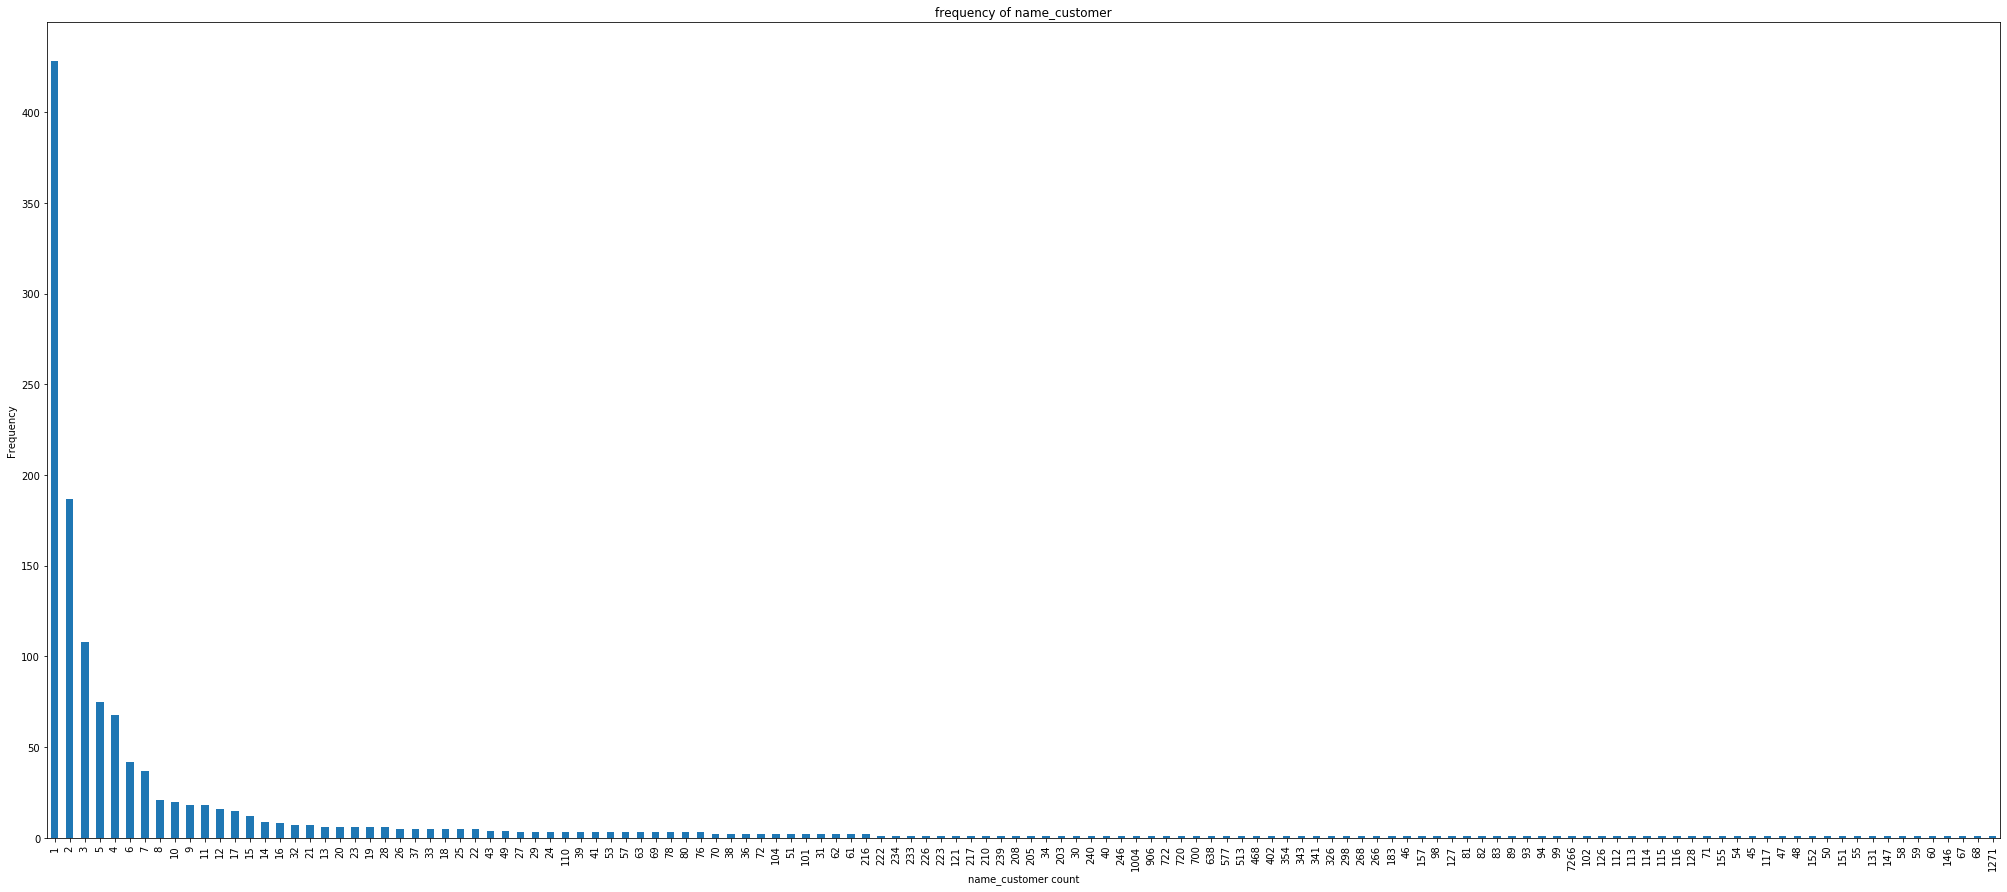

In [50]:
# here we are grouping according to cust_number and finding the count of name_customer in it.
df1=X_train.groupby("cust_number").agg({'name_customer':'count'}).reset_index()
print(df1)

ax = df1['name_customer'].value_counts().plot(kind='bar',
                                    figsize=(35,15),
                                    title="frequency of name_customer")
ax.set_xlabel("name_customer count")
ax.set_ylabel("Frequency")

In [51]:
# from the above graph it's clear that there are many new customer and upto 5 there are many new customer.

In [52]:
X_train.drop('delay',axis=1,inplace=True)   # dropping delay from train.
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms
0,CA02,0140104409,LOB associates,2019-12-27,2019.0,2018-11-07,2018-11-17,CAD,X2,396.60,CA10
1,U001,0200668077,IN-N- foundation,2019-01-17,2019.0,2018-12-30,2019-01-09,USD,RV,26582.40,NA10
2,U001,0200744019,TARG co,2019-01-18,2019.0,2018-12-30,2019-01-14,USD,RV,53110.54,NAA8
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,16975.04,NAH4
4,U001,0200706844,WINC systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,57640.90,NAA8


# 5.Feature Engineering

In [53]:

# for target encoding we will be adding delay i.e., our target column to train df.
X_train['target'] = y_train 

In [54]:
# here we are keeping count of name_customer belonging to its cust_number.
df1=X_train.groupby("cust_number").agg({'name_customer':'count'}).reset_index()  # we can use doc_id also here
print(df1.sample(5))

# to store cust_number having more name_customer or frequently occuring customer
frequent_customer=df1[df1.name_customer>=5].cust_number.unique()  # 5 is our threshold below it won't be placed in our frequent table
frequent_customer[:5]  

     cust_number  name_customer
84    0100027281              2
677   0200726025             15
217   0100047429              1
1051   200093491              2
534   0200434439             83


array(['0100000222', '0100001196', '0100001222', '0100004335',
       '0100004536'], dtype=object)

In [55]:
# creating a freq_cust_number to store the non-frequent customer as other or to handle unseen data for in future.
X_train['freq_cust_number']=np.where(X_train.cust_number.isin(frequent_customer),X_train['cust_number'],'others')
X_test['freq_cust_number']=np.where(X_test.cust_number.isin(frequent_customer),X_test['cust_number'],'others')
X_val['freq_cust_number']=np.where(X_val.cust_number.isin(frequent_customer),X_val['cust_number'],'others')

In [56]:
# here we will be mapping average of each cust_number delay to their respective cust_number
Avg_cust_number_delay_enc = X_train.groupby('cust_number')['target'].mean().to_dict()


X_train.loc[:,'freq_cust_number_enc'] = X_train['cust_number'].map(Avg_cust_number_delay_enc)
X_val.loc[:,'freq_cust_number_enc']   = X_val['cust_number'].map(Avg_cust_number_delay_enc)
X_test.loc[:,'freq_cust_number_enc']  = X_test['cust_number'].map(Avg_cust_number_delay_enc)

In [57]:
X_train[['freq_cust_number','freq_cust_number_enc']].sample(10)

,freq_cust_number,freq_cust_number_enc
34206,0200718130,1.876033
31558,0200799367,2.170833
10159,0200769623,-2.157308
21238,0200769623,-2.157308
16659,0200331749,1.830357
33093,0200769556,-7.315789
18233,0200707005,0.651685
1718,0200743996,-1.622642
10595,0200820380,0.629032
33114,0200739534,0.807947


In [58]:
# now we can remove freq_cust_number & cust_number
X_train.drop(columns=['freq_cust_number','cust_number'],inplace=True)
X_val.drop(columns=['freq_cust_number','cust_number'],inplace=True)
X_test.drop(columns=['freq_cust_number','cust_number'],inplace=True)

In [59]:
X_val.isnull().sum()  # we can see freq_cust_number_enc has some mismatched column therefore it is Null 

business_code              0
name_customer              0
clear_date                 0
buisness_year              0
document_create_date.1     0
due_in_date                0
invoice_currency           0
document type              0
total_open_amount          0
cust_payment_terms         0
freq_cust_number_enc      50
dtype: int64

In [60]:
Avg_payment_terms_delay_enc = X_train.groupby('cust_payment_terms')['target'].mean().to_dict()

X_train.loc[:,'cust_payment_terms_enc'] = X_train['cust_payment_terms'].map(Avg_payment_terms_delay_enc)
X_val.loc[:,'cust_payment_terms_enc']   = X_val['cust_payment_terms'].map(Avg_payment_terms_delay_enc)
X_test.loc[:,'cust_payment_terms_enc']  = X_test['cust_payment_terms'].map(Avg_payment_terms_delay_enc)

In [61]:
# now we can remove cust_payment_terms
X_train.drop(columns=['cust_payment_terms'],inplace=True)
X_val.drop(columns=['cust_payment_terms'],inplace=True)
X_test.drop(columns=['cust_payment_terms'],inplace=True)

In [62]:
X_test.isnull().sum()

business_code              0
name_customer              0
clear_date                 0
buisness_year              0
document_create_date.1     0
due_in_date                0
invoice_currency           0
document type              0
total_open_amount          0
freq_cust_number_enc      49
cust_payment_terms_enc     5
dtype: int64

In [63]:
# we can see there are some NaN so we need to take care of these as well by imputing null with median

In [64]:
# imputing NaN with median of that variable.
# we will be imputing with median because our data contains outliers so it won't be affected.
def impute_na(df, variable, median):
    df[variable] = df[variable].fillna(median) 

# finding median of each encoded column
median_cust_number = X_train['freq_cust_number_enc'].median()
median_cust_payment_terms = X_train['cust_payment_terms_enc'].median()

# imputing NaN in cust_number column
impute_na(X_train, 'freq_cust_number_enc', median_cust_number)
impute_na(X_val, 'freq_cust_number_enc', median_cust_number)
impute_na(X_test, 'freq_cust_number_enc', median_cust_number)

impute_na(X_train, 'cust_payment_terms_enc', median_cust_payment_terms)
impute_na(X_val, 'cust_payment_terms_enc', median_cust_payment_terms)
impute_na(X_test, 'cust_payment_terms_enc', median_cust_payment_terms)


In [65]:
X_train.isnull().sum()

business_code             0
name_customer             0
clear_date                0
buisness_year             0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
target                    0
freq_cust_number_enc      0
cust_payment_terms_enc    0
dtype: int64

In [66]:
# Now We can extract useful insights from our document_create_date.1 column like , month , quater, week

# storing month , quarter and week , days and year won't be much helpful.
X_train['due_in_date_month']=X_train['due_in_date'].dt.month
X_train['due_in_date_quarter']=X_train['due_in_date'].dt.quarter
X_train['due_in_date_dayofweek']=X_train['due_in_date'].dt.dayofweek

X_val['due_in_date_month']=X_val['due_in_date'].dt.month
X_val['due_in_date_quarter']=X_val['due_in_date'].dt.quarter
X_val['due_in_date_dayofweek']=X_val['due_in_date'].dt.dayofweek

X_test['due_in_date_month']=X_test['due_in_date'].dt.month
X_test['due_in_date_quarter']=X_test['due_in_date'].dt.quarter
X_test['due_in_date_dayofweek']=X_test['due_in_date'].dt.dayofweek

In [67]:
# as we saw in EDA how due_date's week 4,6 and last month is more prone to delay 
# so we are extracting these info here 

X_train['due_day_of_week_4_6'] = np.where((X_train['due_in_date'].dt.dayofweek ==4) | (X_train['due_in_date'].dt.dayofweek ==6),1,0)
X_val['due_day_of_week_4_6'] = np.where((X_val['due_in_date'].dt.dayofweek ==4) | (X_val['due_in_date'].dt.dayofweek ==6),1,0)
X_test['due_day_of_week_4_6'] = np.where((X_test['due_in_date'].dt.dayofweek ==4) |(X_test['due_in_date'].dt.dayofweek ==6),1,0)

X_train['due_month_12'] = np.where(X_train['due_in_date'].dt.month ==12,1,0)
X_val['due_month_12'] = np.where(X_val['due_in_date'].dt.month ==12,1,0)
X_test['due_month_12'] = np.where(X_test['due_in_date'].dt.month ==12,1,0)


In [68]:
X_train.head()

,business_code,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,target,freq_cust_number_enc,cust_payment_terms_enc,due_in_date_month,due_in_date_quarter,due_in_date_dayofweek,due_day_of_week_4_6,due_month_12
0,CA02,LOB associates,2019-12-27,2019.0,2018-11-07,2018-11-17,CAD,X2,396.60,405,3.380368,6.329978,11,4,5,0,0
1,U001,IN-N- foundation,2019-01-17,2019.0,2018-12-30,2019-01-09,USD,RV,26582.40,8,5.600000,3.074919,1,1,2,0,0
2,U001,TARG co,2019-01-18,2019.0,2018-12-30,2019-01-14,USD,RV,53110.54,4,2.612500,1.383718,1,1,0,0,0
3,U001,WAL-MAR us,2019-01-09,2019.0,2018-12-30,2019-01-14,USD,RV,16975.04,-5,-2.157308,-1.803489,1,1,0,0,0
4,U001,WINC systems,2019-01-15,2019.0,2018-12-30,2019-01-14,USD,RV,57640.90,1,0.516260,1.383718,1,1,0,0,0


In [69]:
# Now we can remove clear date , business year,doc_id, document_create_date.1, due_in_date from train,test and val
# and additional target column from train.
X_train.drop(columns=['clear_date','buisness_year','document_create_date.1','due_in_date','document type','name_customer','target'],inplace=True)
X_val.drop(columns=['clear_date','buisness_year','document_create_date.1','due_in_date','document type','name_customer'],inplace=True)
X_test.drop(columns=['clear_date','buisness_year','document_create_date.1','due_in_date','document type','name_customer'],inplace=True)

X_train.head()

,business_code,invoice_currency,total_open_amount,freq_cust_number_enc,cust_payment_terms_enc,due_in_date_month,due_in_date_quarter,due_in_date_dayofweek,due_day_of_week_4_6,due_month_12
0,CA02,CAD,396.60,3.380368,6.329978,11,4,5,0,0
1,U001,USD,26582.40,5.600000,3.074919,1,1,2,0,0
2,U001,USD,53110.54,2.612500,1.383718,1,1,0,0,0
3,U001,USD,16975.04,-2.157308,-1.803489,1,1,0,0,0
4,U001,USD,57640.90,0.516260,1.383718,1,1,0,0,0


In [70]:
# to do dummy encoding of business_code and invoice_currency.

X_train = pd.get_dummies(X_train, columns=['business_code','invoice_currency'], drop_first=True)
X_val=pd.get_dummies(X_val, columns=['business_code','invoice_currency'], drop_first=True)
X_test=pd.get_dummies(X_test, columns=['business_code','invoice_currency'], drop_first=True)
X_train.head()

,total_open_amount,freq_cust_number_enc,cust_payment_terms_enc,due_in_date_month,due_in_date_quarter,due_in_date_dayofweek,due_day_of_week_4_6,due_month_12,business_code_U001,business_code_U002,business_code_U005,business_code_U007,business_code_U013,invoice_currency_USD
0,396.60,3.380368,6.329978,11,4,5,0,0,0,0,0,0,0,0
1,26582.40,5.600000,3.074919,1,1,2,0,0,1,0,0,0,0,1
2,53110.54,2.612500,1.383718,1,1,0,0,0,1,0,0,0,0,1
3,16975.04,-2.157308,-1.803489,1,1,0,0,0,1,0,0,0,0,1
4,57640.90,0.516260,1.383718,1,1,0,0,0,1,0,0,0,0,1


In [71]:
print(X_train.columns) #here we have to drop business_code_U005,business_code_U007
print(X_val.columns)  
print(X_test.columns) # here we have to drop business_code_U005

Index(['total_open_amount', 'freq_cust_number_enc', 'cust_payment_terms_enc',
       'due_in_date_month', 'due_in_date_quarter', 'due_in_date_dayofweek',
       'due_day_of_week_4_6', 'due_month_12', 'business_code_U001',
       'business_code_U002', 'business_code_U005', 'business_code_U007',
       'business_code_U013', 'invoice_currency_USD'],
      dtype='object')
Index(['total_open_amount', 'freq_cust_number_enc', 'cust_payment_terms_enc',
       'due_in_date_month', 'due_in_date_quarter', 'due_in_date_dayofweek',
       'due_day_of_week_4_6', 'due_month_12', 'business_code_U001',
       'business_code_U002', 'business_code_U013', 'invoice_currency_USD'],
      dtype='object')
Index(['total_open_amount', 'freq_cust_number_enc', 'cust_payment_terms_enc',
       'due_in_date_month', 'due_in_date_quarter', 'due_in_date_dayofweek',
       'due_day_of_week_4_6', 'due_month_12', 'business_code_U001',
       'business_code_U002', 'business_code_U005', 'business_code_U013',
       'invoic

In [72]:
# we are dropping these column because we need test train and val to have same no. of features.
X_train.drop(columns=['business_code_U005','business_code_U007'],inplace=True)
X_test.drop(columns =['business_code_U005'],inplace=True)

In [73]:
X_train.head()

,total_open_amount,freq_cust_number_enc,cust_payment_terms_enc,due_in_date_month,due_in_date_quarter,due_in_date_dayofweek,due_day_of_week_4_6,due_month_12,business_code_U001,business_code_U002,business_code_U013,invoice_currency_USD
0,396.60,3.380368,6.329978,11,4,5,0,0,0,0,0,0
1,26582.40,5.600000,3.074919,1,1,2,0,0,1,0,0,1
2,53110.54,2.612500,1.383718,1,1,0,0,0,1,0,0,1
3,16975.04,-2.157308,-1.803489,1,1,0,0,0,1,0,0,1
4,57640.90,0.516260,1.383718,1,1,0,0,0,1,0,0,1


# 6.Feature Selection

##### 1. Dropping constant and quassi-constant features:

In [74]:
from sklearn.feature_selection import VarianceThreshold

#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(X_train)
#the number of non-constant features.
len(X_train.columns[constant_filter.get_support()])

12

In [75]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))   # we get zero constant columns 

0


###### 2.Correlation

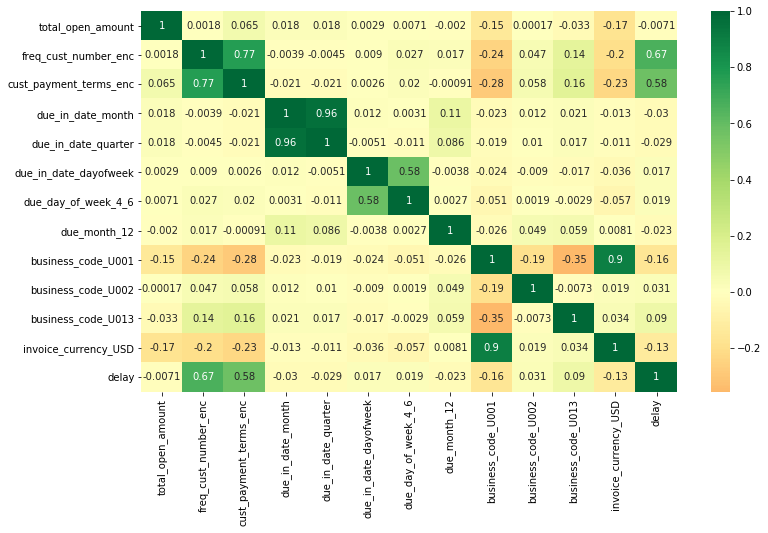

In [76]:
# to see correlation of rows with target we are joining it .
X1=pd.merge(X_train,y_train,left_index=True, right_index=True )
plt.figure(figsize=(12,7))
p=sns.heatmap(X1.corr(), annot=True,cmap='RdYlGn',center=0) 

##### 3.Tree-based Feature Importance

In [77]:
def tree_based_feature_importance(X_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(X_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

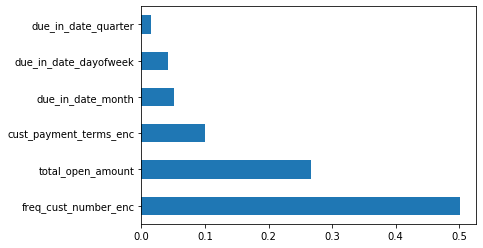

In [78]:
feature_importance=tree_based_feature_importance(X_train,y_train)#features importance data frame

In [79]:
display(feature_importance)  # to display the important features.

,Features,Importances
1,freq_cust_number_enc,0.501658
0,total_open_amount,0.267239
2,cust_payment_terms_enc,0.100671
3,due_in_date_month,0.050547
5,due_in_date_dayofweek,0.041405
4,due_in_date_quarter,0.015584
6,due_day_of_week_4_6,0.009773
8,business_code_U001,0.004430
11,invoice_currency_USD,0.003335
9,business_code_U002,0.002843


In [80]:
## we can see that freq_name_customer and freq_cust_number are highly correlated
## also quarter and month are highly correlated 

## and from feature importance table we can see 
## freq_cust_number_enc is more important than freq_name_customer
## document_create_date.1_dayofmonth is more important than document_create_date.1_quarter

In [85]:
# Based on above graph and tables understanding we be including these features for prediction.
# features included
X_train=X_train[['total_open_amount','freq_cust_number_enc','due_day_of_week_4_6','due_month_12','business_code_U001','business_code_U002','business_code_U013']]
X_val=X_val[['total_open_amount','freq_cust_number_enc','due_day_of_week_4_6','due_month_12','business_code_U001','business_code_U002','business_code_U013']]
X_test=X_test[['total_open_amount','freq_cust_number_enc','due_day_of_week_4_6','due_month_12','business_code_U001','business_code_U002','business_code_U013']]

In [86]:
X_train.head()

,total_open_amount,freq_cust_number_enc,due_day_of_week_4_6,due_month_12,business_code_U001,business_code_U002,business_code_U013
0,396.60,3.380368,0,0,0,0,0
1,26582.40,5.600000,0,0,1,0,0
2,53110.54,2.612500,0,0,1,0,0
3,16975.04,-2.157308,0,0,1,0,0
4,57640.90,0.516260,0,0,1,0,0


# 7.Feature Scaling

In [87]:
# this scales the features between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler() # to create an instance
X_train_sc = scaler.fit_transform(X_train)       # fit the scaler to the train set and then transform it
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)             # transform (scale) the test set

# 8. Modelling

## Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)

# Predicting the Test Set Results
predicted_train = rf.predict(X_train_sc)
predicted = rf.predict(X_test_sc)

In [90]:
print(rf.score(X_train_sc, y_train))
print(rf.score(X_test_sc, y_test))
print('\n')
print(np.sqrt(mean_squared_error(y_train, predicted_train)))
print(np.sqrt(mean_squared_error(y_test, predicted)))

0.8918660132806101
0.10891588529372398


3.797199561567212
9.86428013921085


In [91]:
# This is inital score as we can see results aren't that good so let's tune it.

## Hyperparameter Tuning

In [92]:
# for tuning we are joining val and train set.

X_frames=[X_train,X_val]
X=pd.concat(X_frames)

y_frames=[y_train,y_val]
y=pd.concat(y_frames)

print(X.shape) 
X.head()
X_sc = scaler.transform(X)  # scaling the data

(40389, 7)


In [93]:
# the below tuning tuning I have only 2 time it was taking time process
# so now I will we the best parameter only.

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [95]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [299]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 10 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
# rf_random.fit(X_sc,y)   

In [96]:
# rf_random.best_params_   # to see the best paramaters.

In [97]:
# from first tuning we get this.

# rf_final = RandomForestRegressor(n_estimators: 600,
#  min_samples_split: 10,
#  min_samples_leaf: 4,
#  max_features: sqrt,
#  max_depth: 90,
#  bootstrap: False)

In [98]:
# from 2nd tuning we get this.

# rf_final = RandomForestRegressor({'n_estimators': 1200,
#  'min_samples_split': 2,
#  'min_samples_leaf': 4,
#  'max_features': 'auto',
#  'max_depth': 100,
#  'bootstrap': True})

In [159]:
# rf_final = RandomForestRegressor(**rf_random.best_params_)

# here we are passing tuned parameters to get better result.

# running this might take some time.
rf_final = RandomForestRegressor(**{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False})
rf_final.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [162]:
predicted_train = rf_final.predict(X_train)
predicted = rf_final.predict(X_test)

In [163]:
print(rf_final.score(X_train, y_train))
print(rf_final.score(X_test, y_test))            # this is our test predicted scores.
print('\n')
print(np.sqrt(mean_squared_error(y_train, predicted_train)))
print(np.sqrt(mean_squared_error(y_test, predicted))) # this is mean_squared_error.

0.6404678248078316
0.2911522697927511


6.923906518073561
8.797970940359146


In [102]:
# we are getting this much error 
# we can further decrease this by tuning our parameters.
# but for the time being i will be using this regression model to predict further.

# 9.Predicting  Delay & Clear Date of Final Test

In [106]:
df_final_test.head()  # our final_test data which needs to predicted.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200230690,DECA us,NaN,2020.0,1.930804e+09,2020-04-21,20200421,20200421,20200509.0,USD,RV,1.0,NaN,3286.72,20200416.0,NAM4,1.930804e+09,1
1,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930633e+09,2020-03-11,20200310,20200311,20200326.0,USD,RV,1.0,NaN,4322.59,20200311.0,NAA8,1.930633e+09,1
2,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930846e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,50123.11,20200502.0,NAH4,1.930846e+09,1
3,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930684e+09,2020-03-22,20200321,20200322,20200406.0,USD,RV,1.0,NaN,356.39,20200322.0,NAH4,1.930684e+09,1
4,CA02,0140104429,COSTCO in,NaN,2020.0,2.960632e+09,2020-05-06,20200506,20200506,20200518.0,CAD,RV,1.0,NaN,2201.38,20200508.0,CA10,2.960632e+09,1


In [164]:
def predict(df_final_test):
#     predicted_delay=[]
    # keeping only relavant features in df_predict dataframe.
    df_predict = df_final_test[['business_code','cust_number','due_in_date','total_open_amount']]
    
    # pre-processing the above df_predict.
    df_predict = pd.get_dummies(df_predict, columns=['business_code'], drop_first=True)
    df_predict['due_in_date']=pd.to_datetime(df_predict['due_in_date'], format='%Y%m%d')
    df_predict.loc[:,'freq_cust_number_enc'] = df_predict['cust_number'].map(Avg_cust_number_delay_enc)
    impute_na(df_predict, 'freq_cust_number_enc', median_cust_number)
    df_predict['due_day_of_week_4_6'] = np.where((df_predict['due_in_date'].dt.dayofweek ==4) |(df_predict['due_in_date'].dt.dayofweek ==6),1,0)
    df_predict['due_month_12'] = np.where(df_predict['due_in_date'].dt.month ==12,1,0)
    
    # dropping unnecessary feature
    df_predict.drop(columns=['cust_number','due_in_date'],inplace=True)
    
    return rf_final.predict(df_predict)
#     return predicted_delay

0       3 days
1       1 days
2       2 days
3      21 days
4       0 days
         ...  
4985    1 days
4986    1 days
4987    3 days
4988    1 days
4989   -1 days
Name: predicted_delay, Length: 4990, dtype: timedelta64[ns]

# 10.Predicted Payment Date & Buckets

#### Payment Dates

In [186]:
# calling predict function and passing df_final_test dataset which we separated initially as argument.
# predicted_delay = predict(df_final_test)

Predicted = predict(df_final_test)
df_final_test['predicted_delay'] = Predicted
Days = df_final_test['predicted_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D')) # to convert to days
Days


# adding delay to due_date to generate clear_date/Payment_date
df_final_test['Payment_Date'] = df_final_test['due_in_date'] + Days

#printing table.
df_final_test[['due_in_date' , 'Payment_Date']]  

,due_in_date,Payment_Date
0,2020-05-09,2020-05-12
1,2020-03-26,2020-03-27
2,2020-05-17,2020-05-19
3,2020-04-06,2020-04-27
4,2020-05-18,2020-05-18
...,...,...
4985,2020-03-16,2020-03-17
4986,2020-03-21,2020-03-22
4987,2020-03-20,2020-03-23
4988,2020-03-17,2020-03-18


#### Buckets

In [196]:

Predicted = np.rint(Predicted)
# bucket to store various delays
bucket = []
for x in Predicted:
    if x<0:
        bucket.append('No delay')
    elif x<=15 and x>=0:
        bucket.append('0 to 15 days')
    elif x<=30 and x>=16:
        bucket.append('16 to 30 days')
    elif x<=45 and x>=31:
        bucket.append('31 to 45 days')
    elif x<=60 and x>=46:
        bucket.append('46 to 60 days')
    else:
        bucket.apend('Greater than 60 days')

# zipping df and bucket together
temp = (zip(list(df_final_test),bucket)) 
temp


In [197]:
# converting to dataframe
df = pd.DataFrame(temp, columns = ['Due_in_date', 'Aging bucket']) 

In [198]:
df

,Due_in_date,Aging bucket
0,business_code,0 to 15 days
1,cust_number,0 to 15 days
2,name_customer,0 to 15 days
3,clear_date,16 to 30 days
4,buisness_year,0 to 15 days
5,doc_id,0 to 15 days
6,posting_date,0 to 15 days
7,document_create_date,0 to 15 days
8,document_create_date.1,0 to 15 days
9,due_in_date,0 to 15 days
